#Random Forest Model

##Data Prep

In [ ]:
!pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=e97810138c80a71bff1a6509df60b4a7549c03c525e0171eed9d99f51ba81799
  Stored in directory: /root/.cache/pip/wheels/29/93/3f/af54c413cecaac292940342c61882d2a8848674175d0bb0889
Successfully built pydataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

initiated datasets repo at: /root/.pydataset/


In [ ]:
# Read the CSV file
df = pd.read_csv('/content/Sorted no TOF Ultrasound Measurement Data Fix.txt', skiprows=1, sep='\t', header=None).iloc[:,:10]
df

,0,1,2,3,4,5,6,7,8,9
0,30,0.43,0.33,1.303,0.265,144.0,212.0,15.73,3.4,30.0
1,30,0.43,0.34,1.265,0.235,143.0,215.0,15.85,3.1,27.0
2,30,0.44,0.33,1.333,0.288,145.0,210.0,15.92,4.0,31.0
3,30,0.44,0.34,1.294,0.258,144.0,213.0,15.51,3.3,29.0
4,30,0.45,0.33,1.364,0.310,143.0,216.0,15.68,3.6,32.0
5,30,0.45,0.34,1.324,0.280,145.0,211.0,15.60,3.9,28.0
6,30,0.46,0.33,1.394,0.332,144.0,214.0,15.95,3.2,30.0
7,30,0.43,0.34,1.265,0.235,145.0,210.0,15.54,3.5,31.0
8,30,0.44,0.33,1.333,0.288,143.0,213.0,15.78,4.1,29.0
9,30,0.45,0.34,1.324,0.280,144.0,215.0,15.62,3.0,27.0


In [ ]:
trim_df = df.iloc[:75,:]
trim_df

,0,1,2,3,4,5,6,7,8,9
0,30,0.43,0.33,1.303,0.265,144.0,212.0,15.73,3.4,30.0
1,30,0.43,0.34,1.265,0.235,143.0,215.0,15.85,3.1,27.0
2,30,0.44,0.33,1.333,0.288,145.0,210.0,15.92,4.0,31.0
3,30,0.44,0.34,1.294,0.258,144.0,213.0,15.51,3.3,29.0
4,30,0.45,0.33,1.364,0.310,143.0,216.0,15.68,3.6,32.0
5,30,0.45,0.34,1.324,0.280,145.0,211.0,15.60,3.9,28.0
6,30,0.46,0.33,1.394,0.332,144.0,214.0,15.95,3.2,30.0
7,30,0.43,0.34,1.265,0.235,145.0,210.0,15.54,3.5,31.0
8,30,0.44,0.33,1.333,0.288,143.0,213.0,15.78,4.1,29.0
9,30,0.45,0.34,1.324,0.280,144.0,215.0,15.62,3.0,27.0


In [ ]:
shuffled_df = trim_df.sample(frac=1, random_state=2).reset_index(drop=True)
shuffled_df

,0,1,2,3,4,5,6,7,8,9
0,50,0.39,0.33,1.182,0.167,146.0,220.0,12.68,2.2,25.0
1,50,0.41,0.33,1.242,0.217,148.0,222.0,12.90,2.4,23.0
2,30,0.43,0.34,1.265,0.235,143.0,215.0,15.85,3.1,27.0
3,30,0.46,0.33,1.394,0.332,144.0,211.0,15.80,3.2,30.0
4,50,0.41,0.35,1.171,0.158,148.0,222.0,13.56,2.4,23.0
5,70,0.36,0.31,1.161,0.150,151.0,224.0,9.99,2.1,22.0
6,70,0.34,0.33,1.030,0.030,155.0,228.0,10.90,2.0,19.0
7,50,0.41,0.35,1.171,0.158,148.0,219.0,12.99,2.4,23.0
8,50,0.40,0.35,1.143,0.134,147.0,222.0,12.92,2.3,24.0
9,70,0.34,0.33,1.030,0.030,152.0,227.0,10.67,1.5,21.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalize the feature dataframe
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(shuffled_df)
normalized_df = pd.DataFrame(normalized_data, columns=shuffled_df.columns)

In [ ]:
# x y
X_all = normalized_df.iloc[:,1:10]
y_all = shuffled_df.iloc[:,0]

In [ ]:
# x y
X_75 = normalized_df.iloc[:75,1:10]
y_75 = shuffled_df.iloc[:75,0]

In [ ]:
# Split Data all
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size = 0.3, random_state = 0)
# Split Data 75
X_train_75, X_test_75, y_train_75, y_test_75 = train_test_split(X_75, y_75, test_size = 0.3, random_state = 0)

In [ ]:
# Random Forest training
forest_all = RandomForestRegressor(n_estimators=500, random_state=0)
errors_y_all = {'mae': [], 'rmse': [], 'r2': []}
forest_75 = RandomForestRegressor(n_estimators=500, random_state=0)
errors_y_75 = {'mae': [], 'rmse': [], 'r2': []}

##All Features

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#all
folds = KFold(n_splits=7, shuffle=False)
for i, (train_idx, val_idx) in enumerate(folds.split(X_train_all, y_train_all)):
  train_data_all, train_target_all = X_train_all.iloc[train_idx], y_train_all.iloc[train_idx]
  val_data_all, val_target_all = X_train_all.iloc[val_idx], y_train_all.iloc[val_idx]
  forest_all.fit(train_data_all, train_target_all)
  predictions_all = forest_all.predict(val_data_all)
  error_y_all_mae = mean_absolute_error(predictions_all[:], val_target_all.values)
  error_y_all_mse = mean_squared_error(predictions_all[:], val_target_all.values)
  error_y_all_rmse = np.sqrt(error_y_all_mse)
  error_y_all_r2 = r2_score(predictions_all, val_target_all.values)
  errors_y_all['mae'].append(error_y_all_mae)
  errors_y_all['rmse'].append(error_y_all_rmse)
  errors_y_all['r2'].append(error_y_all_r2)

In [ ]:
print(f"Average MAE y: {np.mean(errors_y_all['mae']):.2f} RMSE y: {np.mean(errors_y_all['rmse']):.2f} R2 y: {np.mean(errors_y_all['r2']):.2f}")

Average MAE y: 0.27 RMSE y: 0.60 R2 y: 1.00


In [ ]:
#75
folds = KFold(n_splits=7, shuffle=False)
for j, (train_idx, val_idx) in enumerate(folds.split(X_train_75, y_train_75)):
  train_data_75, train_target_75 = X_train_75.iloc[train_idx], y_train_75.iloc[train_idx]
  val_data_75, val_target_75 = X_train_75.iloc[val_idx], y_train_75.iloc[val_idx]
  forest_75.fit(train_data_75, train_target_75)
  predictions_75 = forest_75.predict(val_data_75)
  error_y_75_mae = mean_absolute_error(predictions_75[:75], val_target_75.values)
  error_y_75_mse = mean_squared_error(predictions_75[:75], val_target_75.values)
  error_y_75_rmse = np.sqrt(error_y_75_mse)
  error_y_75_r2 = r2_score(predictions_75, val_target_75.values)
  errors_y_75['mae'].append(error_y_75_mae)
  errors_y_75['rmse'].append(error_y_75_rmse)
  errors_y_75['r2'].append(error_y_75_r2)

In [ ]:
print(f"Average MAE y: {np.mean(errors_y_75['mae']):.2f} RMSE y: {np.mean(errors_y_75['rmse']):.2f} R2 y: {np.mean(errors_y_75['r2']):.2f}")

Average MAE y: 0.71 RMSE y: 1.27 R2 y: 0.99


In [ ]:
#Feature Importance all
# Hitung feature importances
feature_importances_all = forest_all.feature_importances_
print(X_all.columns, "=",feature_importances_all)
# Ambil nama fitur dari dataframe
feature_names_all  = X_all.columns
#Feature Importance 75
# Hitung feature importances
feature_importances_75 = forest_75.feature_importances_
print(X_75.columns, "=",feature_importances_75)
# Ambil nama fitur dari dataframe
feature_names_75 = X_75.columns

Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64') = [0.14549568 0.         0.01652357 0.01868875 0.19136837 0.14750859
 0.15814269 0.14286576 0.17940658]
Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64') = [0.01773954 0.01040482 0.0481072  0.04686238 0.41841274 0.39635879
 0.02105684 0.02068325 0.02037444]


In [ ]:
#all
# Urutkan feature importances dan nama fitur berdasarkan importances dari terbesar ke terkecil
sorted_idx_all = np.argsort(feature_importances_all)[::-1]
sorted_feature_importances_all = feature_importances_all[sorted_idx_all]
sorted_feature_names_all = feature_names_all[sorted_idx_all]
#75
# Urutkan feature importances dan nama fitur berdasarkan importances dari terbesar ke terkecil
sorted_idx_75 = np.argsort(feature_importances_75)[::-1]
sorted_feature_importances_75 = feature_importances_75[sorted_idx_75]
sorted_feature_names_75 = feature_names_75[sorted_idx_75]

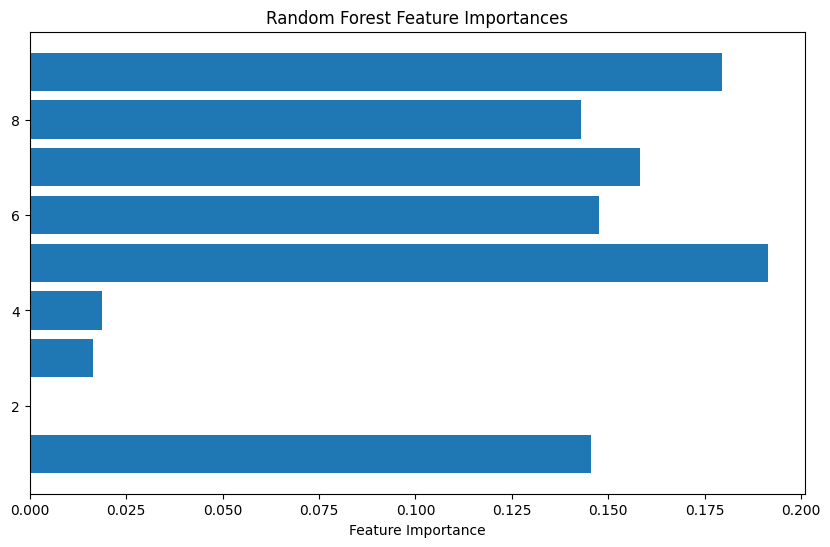

In [ ]:
# Plot diagram blok all
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names_all, sorted_feature_importances_all)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

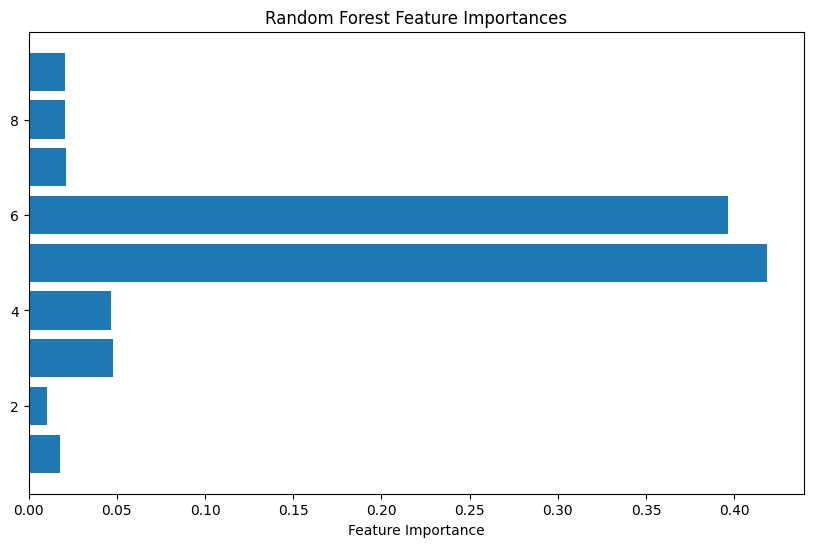

In [ ]:
# Plot diagram blok all
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names_75, sorted_feature_importances_75)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

In [ ]:
#all
#Random Forest test
predictions_all = forest_all.predict(X_test_all)
# Create a DataFrame with actual and predicted values
results_df_all = pd.DataFrame({
'Actual Density': y_test_all.values,
'Predicted Density': predictions_all
})

# Calculate the differences between actual and predicted values
results_df_all['Difference Density'] = abs(results_df_all['Actual Density'] - results_df_all['Predicted Density'])
results_df_all

,Actual Density,Predicted Density,Difference Density
0,70,69.92,0.08
1,30,30.00,0.00
2,50,50.00,0.00
3,50,50.00,0.00
4,30,30.08,0.08
5,70,70.00,0.00
6,50,50.60,0.60
7,50,50.08,0.08
8,70,69.96,0.04
9,50,50.08,0.08


In [ ]:
#All
#Evaluation metrics
mean_diff_y_all = abs(results_df_all['Difference Density'].mean())
std_diff_y_all = results_df_all['Difference Density'].std()
print(mean_diff_y_all,'+-', std_diff_y_all)

mae_y_all = mean_absolute_error(y_test_all, predictions_all[:])
print(f'MAE Density: {mae_y_all:.2f}')
mse_y_all = mean_squared_error(y_test_all, predictions_all[:])
rmse_y_all = np.sqrt(mse_y_all)
print(f' Root Mean Squared Error Density: {rmse_y_all:.2f}')
r2_y_all = r2_score(y_test_all, predictions_all[:])
print(f'R-squared Score Density: {r2_y_all:.2f}')

0.1339130434782614 +- 0.22646972766665144
MAE Density: 0.13
 Root Mean Squared Error Density: 0.26
R-squared Score Density: 1.00


In [ ]:
#75
#Random Forest test
predictions_75 = forest_75.predict(X_test_75)
# Create a DataFrame with actual and predicted values
results_df_75 = pd.DataFrame({
'Actual Density': y_test_75.values,
'Predicted Density': predictions_75[:75]
})

# Calculate the differences between actual and predicted values
results_df_75['Difference Density'] = abs(results_df_75['Actual Density'] - results_df_75['Predicted Density'])
results_df_75

,Actual Density,Predicted Density,Difference Density
0,30,30.00,0.00
1,50,46.72,3.28
2,90,89.96,0.04
3,90,89.96,0.04
4,70,69.92,0.08
5,50,50.68,0.68
6,70,70.08,0.08
7,70,70.92,0.92
8,50,50.16,0.16
9,50,54.48,4.48


#NOTE: DITAMBAHKAN MATRIKS EVALUASI (TP, NP, FP, NP)

In [ ]:
#75
#Evaluation metrics
mean_diff_y_75 = abs(results_df_75['Difference Density'].mean())
std_diff_y_75 = results_df_75['Difference Density'].std()
print(mean_diff_y_75,'+-', std_diff_y_75)

mae_y_75 = mean_absolute_error(y_test_75, predictions_75[:75])
print(f'MAE Density: {mae_y_75:.2f}')
mse_y_75 = mean_squared_error(y_test_75, predictions_75[:75])
rmse_y_75 = np.sqrt(mse_y_75)
print(f' Root Mean Squared Error Density: {rmse_y_75:.2f}')
r2_y_75 = r2_score(y_test_75, predictions_75[:75])
print(f'R-squared Score Density: {r2_y_75:.2f}')

0.5565217391304362 +- 1.120578619592461
MAE Density: 0.56
 Root Mean Squared Error Density: 1.23
R-squared Score Density: 1.00


#Selected Features

In [ ]:
#All
importances_all = forest_all.feature_importances_
feature_names_all = X_train_all.columns
feature_importance_df_all = pd.DataFrame({'Feature': feature_names_all, 'Importance': importances_all})
sorted_feature_all = feature_importance_df_all.sort_values(by='Importance', ascending=False)
sorted_feature_all

,Feature,Importance
4,5,0.191368
8,9,0.179407
6,7,0.158143
5,6,0.147509
0,1,0.145496
7,8,0.142866
3,4,0.018689
2,3,0.016524
1,2,0.000000


In [ ]:
#75
importances_75 = forest_75.feature_importances_
feature_names_75 = X_train_75.columns
feature_importance_df_75 = pd.DataFrame({'Feature': feature_names_75, 'Importance': importances_75})
sorted_feature_75 = feature_importance_df_75.sort_values(by='Importance', ascending=False)
sorted_feature_75

,Feature,Importance
4,5,0.418413
5,6,0.396359
2,3,0.048107
3,4,0.046862
6,7,0.021057
7,8,0.020683
8,9,0.020374
0,1,0.017740
1,2,0.010405


In [ ]:
top_features_all = sorted_feature_all['Feature'][0:3].values
#top_features_all2 = sorted_feature_all['Feature'][5:7].values
#mixed_top_features_all = np.append(top_features_all1, top_features_all2)
X_train_selected_all = X_train_all[top_features_all]
X_test_selected_all = X_test_all[top_features_all]

top_features_75 = sorted_feature_75['Feature'][2:4].values
#top_features_752 = sorted_feature_75['Feature'][5:7].values
#mixed_top_features_75 = np.append(top_features_751, top_features_752)
X_train_selected_75 = X_train_75[top_features_75]
X_test_selected_75 = X_test_75[top_features_75]

In [ ]:
print(top_features_all)
print(top_features_75)

[5 9 7]
[3 4]


In [ ]:
forest_all_new = RandomForestRegressor(n_estimators=500, random_state=0)
errors_y_all_new = {'mae': [], 'rmse': [], 'r2': []}

forest_75_new = RandomForestRegressor(n_estimators=500, random_state=0)
errors_y_75_new = {'mae': [], 'rmse': [], 'r2': []}

In [ ]:
#all
folds = KFold(n_splits=7, shuffle=False)
for i, (train_idx, val_idx) in enumerate(folds.split(X_train_selected_all, y_train_all)):
  train_data_all_new, train_target_all_new = X_train_selected_all.iloc[train_idx], y_train_all.iloc[train_idx]
  val_data_all_new, val_target_all_new = X_train_selected_all.iloc[val_idx], y_train_all.iloc[val_idx]
  forest_all_new.fit(train_data_all_new, train_target_all_new)
  predictions_all_new = forest_all_new.predict(val_data_all_new)
  error_y_all_mae_new = mean_absolute_error(predictions_all_new[:], val_target_all_new.values)
  error_y_all_mse_new = mean_squared_error(predictions_all_new[:], val_target_all_new.values)
  error_y_all_rmse_new = np.sqrt(error_y_all_mse_new)
  error_y_all_r2_new = r2_score(predictions_all_new, val_target_all_new.values)
  errors_y_all_new['mae'].append(error_y_all_mae_new)
  errors_y_all_new['rmse'].append(error_y_all_rmse_new)
  errors_y_all_new['r2'].append(error_y_all_r2_new)

In [ ]:
print(f"Average MAE y: {np.mean(errors_y_all_new['mae']):.2f} RMSE y: {np.mean(errors_y_all_new['rmse']):.2f} R2 y: {np.mean(errors_y_all_new['r2']):.2f}")

Average MAE y: 0.01 RMSE y: 0.02 R2 y: 1.00


In [ ]:
#75
folds = KFold(n_splits=7, shuffle=False)
for j, (train_idx, val_idx) in enumerate(folds.split(X_train_selected_75, y_train_75)):
  train_data_75_new, train_target_75_new = X_train_selected_75.iloc[train_idx], y_train_75.iloc[train_idx]
  val_data_75_new, val_target_75_new = X_train_selected_75.iloc[val_idx], y_train_75.iloc[val_idx]
  forest_75_new.fit(train_data_75_new, train_target_75_new)
  predictions_75_new = forest_75_new.predict(val_data_75_new)
  error_y_75_mae_new = mean_absolute_error(predictions_75_new[:75], val_target_75_new.values)
  error_y_75_mse_new = mean_squared_error(predictions_75_new[:75], val_target_75_new.values)
  error_y_75_rmse_new = np.sqrt(error_y_75_mse_new)
  error_y_75_r2_new = r2_score(predictions_75_new, val_target_75_new.values)
  errors_y_75_new['mae'].append(error_y_75_mae_new)
  errors_y_75_new['rmse'].append(error_y_75_rmse_new)
  errors_y_75_new['r2'].append(error_y_75_r2_new)

In [ ]:
print(f"Average MAE y: {np.mean(errors_y_75_new['mae']):.2f} RMSE y: {np.mean(errors_y_75_new['rmse']):.2f} R2 y: {np.mean(errors_y_75_new['r2']):.2f}")

Average MAE y: 0.01 RMSE y: 0.04 R2 y: 1.00


Custom

In [ ]:
#75
folds = KFold(n_splits=7, shuffle=False)
for j, (train_idx, val_idx) in enumerate(folds.split(X_train_selected_75, y_train_75)):
  train_data_75_new, train_target_75_new = X_train_selected_75.iloc[train_idx], y_train_75.iloc[train_idx]
  val_data_75_new, val_target_75_new = X_train_selected_all.iloc[val_idx], y_train_all.iloc[val_idx]
  forest_75_new.fit(train_data_75_new, train_target_75_new)
  predictions_75_new = forest_75_new.predict(val_data_75_new)
  error_y_75_mae_new = mean_absolute_error(predictions_75_new[:75], val_target_75_new.values)
  error_y_75_mse_new = mean_squared_error(predictions_75_new[:75], val_target_75_new.values)
  error_y_75_rmse_new = np.sqrt(error_y_75_mse_new)
  error_y_75_r2_new = r2_score(predictions_75_new, val_target_75_new.values)
  errors_y_75_new['mae'].append(error_y_75_mae_new)
  errors_y_75_new['rmse'].append(error_y_75_rmse_new)
  errors_y_75_new['r2'].append(error_y_75_r2_new)

ValueError: X has 3 features, but RandomForestRegressor is expecting 2 features as input.

In [ ]:
print(f"Average MAE y: {np.mean(errors_y_75_new['mae']):.2f} RMSE y: {np.mean(errors_y_75_new['rmse']):.2f} R2 y: {np.mean(errors_y_75_new['r2']):.2f}")

Average MAE y: 6.61 RMSE y: 10.72 R2 y: -1.59


##Prediction and Matrices

In [ ]:
#all
#Random Forest test
predictions_all_new = forest_all_new.predict(X_test_selected_all)
# Create a DataFrame with actual and predicted values
results_df_all_new = pd.DataFrame({
'Actual Density': y_test_all.values,
'Predicted Density': predictions_all_new
})

# Calculate the differences between actual and predicted values
results_df_all_new['Difference Density'] = abs(results_df_all_new['Actual Density'] - results_df_all_new['Predicted Density'])
results_df_all_new

,Actual Density,Predicted Density,Difference Density
0,70,70.00,0.00
1,30,30.00,0.00
2,50,50.00,0.00
3,50,50.00,0.00
4,30,30.00,0.00
5,70,70.00,0.00
6,50,49.96,0.04
7,50,50.00,0.00
8,70,70.00,0.00
9,50,50.00,0.00


In [ ]:
#All
#Evaluation metrics
mean_diff_y_all_new = abs(results_df_all_new['Difference Density'].mean())
std_diff_y_all_new = results_df_all_new['Difference Density'].std()
print(mean_diff_y_all_new,'+-', std_diff_y_all_new)

mae_y_all_new = mean_absolute_error(y_test_all, predictions_all_new[:])
print(f'MAE Density: {mae_y_all_new:.2f}')
mse_y_all_new = mean_squared_error(y_test_all, predictions_all_new[:])
rmse_y_all_new = np.sqrt(mse_y_all_new)
print(f' Root Mean Squared Error Density: {rmse_y_all_new:.2f}')
r2_y_all_new = r2_score(y_test_all, predictions_all_new[:])
print(f'R-squared Score Density: {r2_y_all_new:.2f}')

0.0034782608695651434 +- 0.01152416262080097
MAE Density: 0.00
 Root Mean Squared Error Density: 0.01
R-squared Score Density: 1.00


In [ ]:
#75
#Random Forest test
predictions_75_new = forest_75_new.predict(X_test_selected_75)
# Create a DataFrame with actual and predicted values
results_df_75_new = pd.DataFrame({
'Actual Density': y_test_75.values,
'Predicted Density': predictions_75_new
})

# Calculate the differences between actual and predicted values
results_df_75_new['Difference Density'] = abs(results_df_75_new['Actual Density'] - results_df_75_new['Predicted Density'])
results_df_75_new

,Actual Density,Predicted Density,Difference Density
0,70,69.64,0.36
1,70,70.00,0.00
2,30,30.00,0.00
3,70,70.00,0.00
4,50,50.00,0.00
5,50,50.00,0.00
6,70,70.00,0.00
7,70,70.00,0.00
8,50,50.00,0.00
9,30,30.00,0.00


In [ ]:
#75
#Evaluation metrics
mean_diff_y_75_new = abs(results_df_75_new['Difference Density'].mean())
std_diff_y_75_new = results_df_75_new['Difference Density'].std()
print(mean_diff_y_75_new,'+-', std_diff_y_75_new)

mae_y_75_new = mean_absolute_error(y_test_75, predictions_75_new[:75])
print(f'MAE Density: {mae_y_75_new:.2f}')
mse_y_75_new = mean_squared_error(y_test_75, predictions_75_new[:75])
rmse_y_75_new = np.sqrt(mse_y_75_new)
print(f' Root Mean Squared Error Density: {rmse_y_75_new:.2f}')
r2_y_75_new = r2_score(y_test_75, predictions_75_new[:75])
print(f'R-squared Score Density: {r2_y_75_new:.2f}')

0.06260869565217382 +- 0.13951921963737213
MAE Density: 0.06
 Root Mean Squared Error Density: 0.15
R-squared Score Density: 1.00
